## using modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## reading CSV file from my drive

In [2]:
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')


## Creating dataframe and showing it

In [3]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Cleaning**

In [5]:
# Convert 'TotalCharges' to a numeric type
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'], errors='coerce')
dataframe.drop('customerID', axis=1, inplace=True)

### Dropping 30% null values

In [6]:
# # Set the threshold for null values
# threshold = 0.3  # 30% threshold

# # Find columns with null values exceeding the threshold
# columns_to_remove = dataframe.columns[dataframe.isnull().mean() > threshold]

# # Drop the identified columns from the DataFrame
# dataframe = dataframe.drop(columns=columns_to_remove)

# # Display the DataFrame after removing columns with excessive null values
# dataframe.head()


### Dropping columns




In [7]:
# Dropping columns
dataframe= dataframe.dropna(subset=["TotalCharges"])

### Identify the numerical and categorical columns

In [8]:
# Identify numerical columns (int and float types)
numerical_columns = dataframe.select_dtypes(include=['int', 'float']).columns

# Identify categorical columns (object type)
categorical_columns = dataframe.select_dtypes(include=['object']).columns

# Create DataFrames for numerical and categorical features
numerical_data = dataframe[numerical_columns]
categorical_data = dataframe[categorical_columns]

# Display the numerical and categorical DataFrames
print("Numerical Data:\n")
print(numerical_data.isnull().sum())

print("\nCategorical Data:\n")
print(categorical_data.isnull().sum())

Numerical Data:

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

Categorical Data:

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64


In [9]:
numerical_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


## Encoding categorical data

In [10]:
# Initialize the label encoder
label_encoder = LabelEncoder()

label_encoders = {}

# Encode categorical columns
for col in categorical_data.columns:
    categorical_data[col] = label_encoder.fit_transform(categorical_data[col])
    label_encoders[col] = label_encoder  # Save the label encoder for this column

data = pd.concat([numerical_data,categorical_data], axis = 1)
target_variable = 'Churn'



<ipython-input-10-95bfc69a9193>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col] = label_encoder.fit_transform(categorical_data[col])
<ipython-input-10-95bfc69a9193>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col] = label_encoder.fit_transform(categorical_data[col])
<ipython-input-10-95bfc69a9193>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

# **Feature importance**

In [55]:
# Create a DataFrame with features (X) and labels (y)
X = data.drop([target_variable], axis=1)
y = data[target_variable]


# Create and fit a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X,y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the essential features
print("Feature Importance Analysis:")
print(feature_importance_df)

Feature Importance Analysis:
             Feature  Importance
3       TotalCharges    0.191045
2     MonthlyCharges    0.180527
1             tenure    0.161281
16          Contract    0.077050
18     PaymentMethod    0.051980
13       TechSupport    0.042329
10    OnlineSecurity    0.038271
9    InternetService    0.029500
11      OnlineBackup    0.028554
4             gender    0.028043
17  PaperlessBilling    0.025829
5            Partner    0.023429
12  DeviceProtection    0.021958
8      MultipleLines    0.021759
0      SeniorCitizen    0.021042
6         Dependents    0.019612
15   StreamingMovies    0.016630
14       StreamingTV    0.016436
7       PhoneService    0.004726


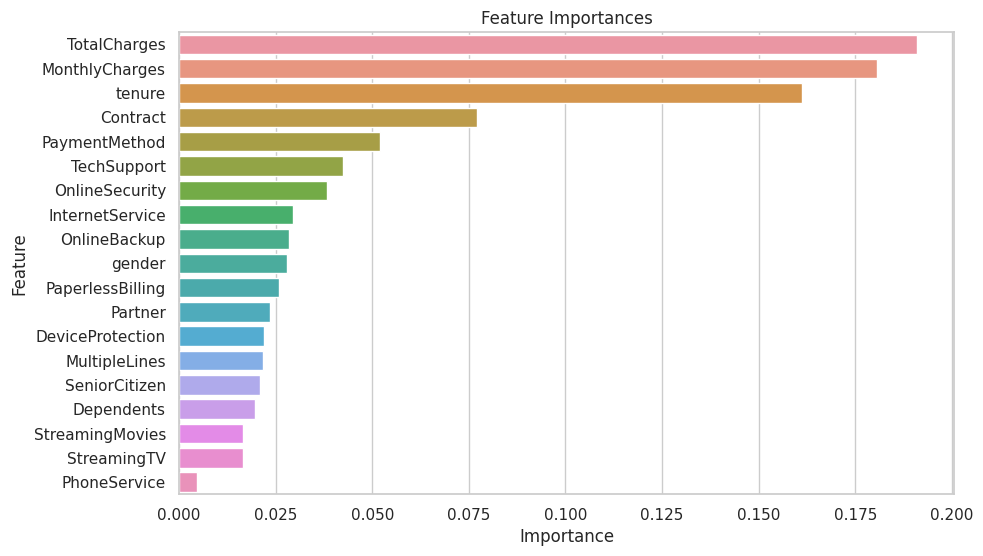

In [56]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [57]:
top_n_features = feature_importance_df['Feature'][:10].tolist()


In [58]:
top_n_features

['TotalCharges',
 'MonthlyCharges',
 'tenure',
 'Contract',
 'PaymentMethod',
 'TechSupport',
 'OnlineSecurity',
 'InternetService',
 'OnlineBackup',
 'gender']

# **Exploratory Data Analysis (EDA)**

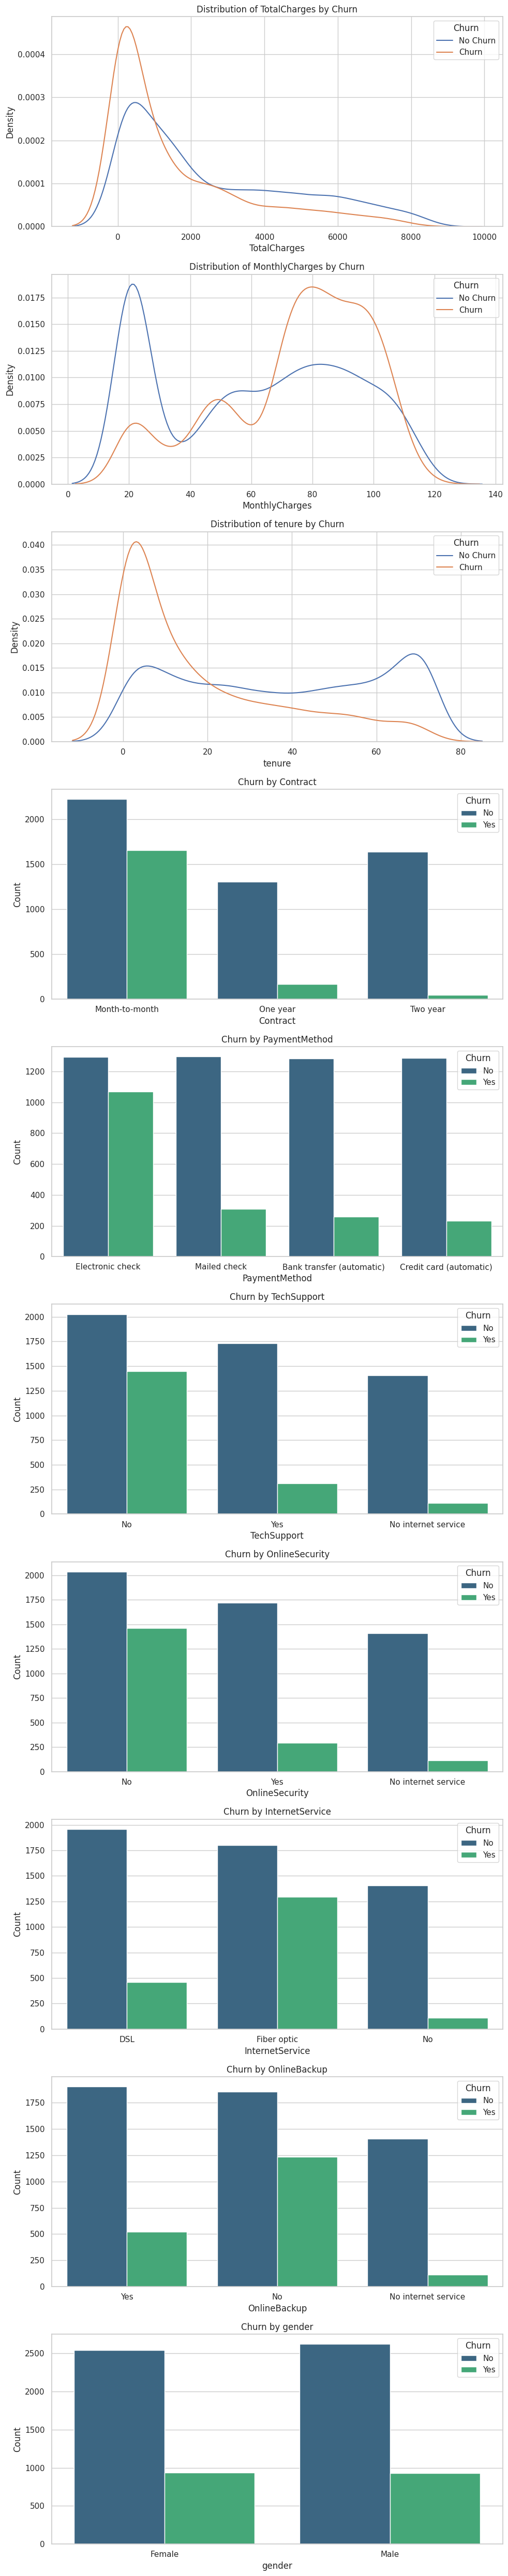

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Features to analyze
features_to_analyze = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod',
                       'TechSupport', 'OnlineSecurity', 'InternetService', 'OnlineBackup', 'gender']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(features_to_analyze), ncols=1, figsize=(10, 5 * len(features_to_analyze)))

# Loop through each feature and create a bar graph or other visualizations
for i, feature in enumerate(features_to_analyze):
    if dataframe[feature].dtype == 'O':  # Categorical feature
        sns.countplot(x=feature, hue='Churn', data=dataframe, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Churn by {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Churn', loc='upper right')
    else:  # Numerical feature
        sns.kdeplot(dataframe[dataframe['Churn'] == 'No'][feature], label='No Churn', ax=axes[i])
        sns.kdeplot(dataframe[dataframe['Churn'] == 'Yes'][feature], label='Churn', ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Churn')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].legend(title='Churn')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## **Data Scaling and Preprocessing**



In [60]:
#scale the numerical values
# Create a StandardScaler instance

y = data['Churn']
X = data[top_n_features]
# Original split to get X_train, X_test, y_train, y_test
# Original split to get X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split X_test, y_test to create a validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [61]:
import pickle

# Assuming 'scaler' is the StandardScaler object
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [62]:
!pip install tensorflow scikeras scikit-learn

## Training


In [63]:
num_classes = 1
epochs = 20
batch_size = 10

# Create the model using Functional API
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f} ,Test Accuracy: {test_accuracy :.4f}')

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_40 (Dense)            (None, 64)                704       
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dropout_32 (Dropout)        (None, 16)                0  

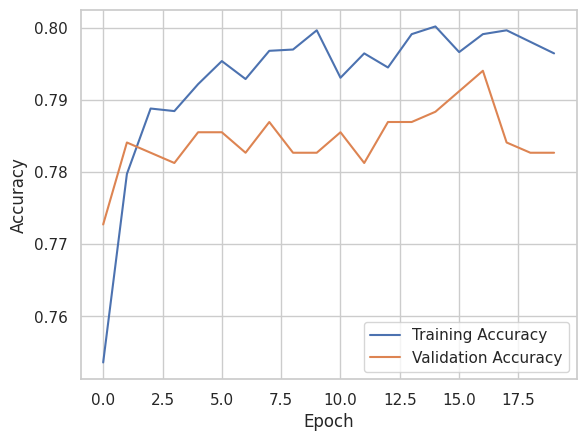

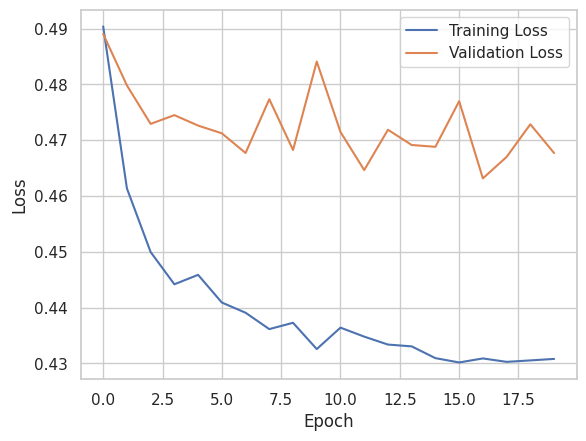

In [64]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Corrected key here
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [65]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Hyperparameter Tuning**

In [36]:
from scikeras.wrappers import KerasClassifier

def create_model(learning_rate=0.001, dropout_rate=0.0):
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    x = tf.keras.layers.Dense(64, activation='relu')(inputs)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model





model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0,dropout_rate=0.0,learning_rate=0.001)

# Define the grid search parameters
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.5],
    'epochs': [10, 20],
    'batch_size': [10, 20]
}

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_result.best_params_)

# Get the best model
best_model = grid_result.best_estimator_


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best Parameters:  {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 20, 'learning_rate': 0.001}


## **Model Evaluation and Saving**

In [37]:
# Save the best model to a file
best_params = grid_result.best_params_
best_model = create_model(dropout_rate=best_params['dropout_rate'])
history =best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)
best_model.save("best_model.h5")

# Evaluate the best model on the validation set
val_loss,val_accuracy = best_model.evaluate(X_val,y_val)
#val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy with Best Model: {:.2f}%".format(val_accuracy * 100))


# Evaluate the best model on the test set
test_loss,test_accuracy = best_model.evaluate(X_test,y_test)
#test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy with Best Model: {:.2f}%".format(test_accuracy * 100))

Epoch 1/20
563/563 [==============================] - 2s 2ms/step - loss: 0.4978 - accuracy: 0.7436
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.4474 - accuracy: 0.7872
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.7916
Epoch 4/20
563/563 [==============================] - 2s 3ms/step - loss: 0.4371 - accuracy: 0.7902
Epoch 5/20
563/563 [==============================] - 2s 3ms/step - loss: 0.4346 - accuracy: 0.7980
Epoch 6/20
563/563 [==============================] - 2s 3ms/step - loss: 0.4295 - accuracy: 0.7902
Epoch 7/20
563/563 [==============================] - 2s 3ms/step - loss: 0.4311 - accuracy: 0.7975
Epoch 8/20
563/563 [==============================] - 2s 3ms/step - loss: 0.4285 - accuracy: 0.7995
Epoch 9/20
563/563 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8034
Epoch 10/20
563/563 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.7991

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7926
Validation Accuracy with Best Model: 79.26%
22/22 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8009
Test Accuracy with Best Model: 80.09%


In [34]:
!pip freeze | grep 'numpy\|pandas\|scikit-learn\|tensorflow' > requirements.txt

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       528
           1       0.25      0.29      0.27       175

    accuracy                           0.61       703
   macro avg       0.50      0.50      0.50       703
weighted avg       0.63      0.61      0.62       703



Text(178.75, 0.5, 'True Number')

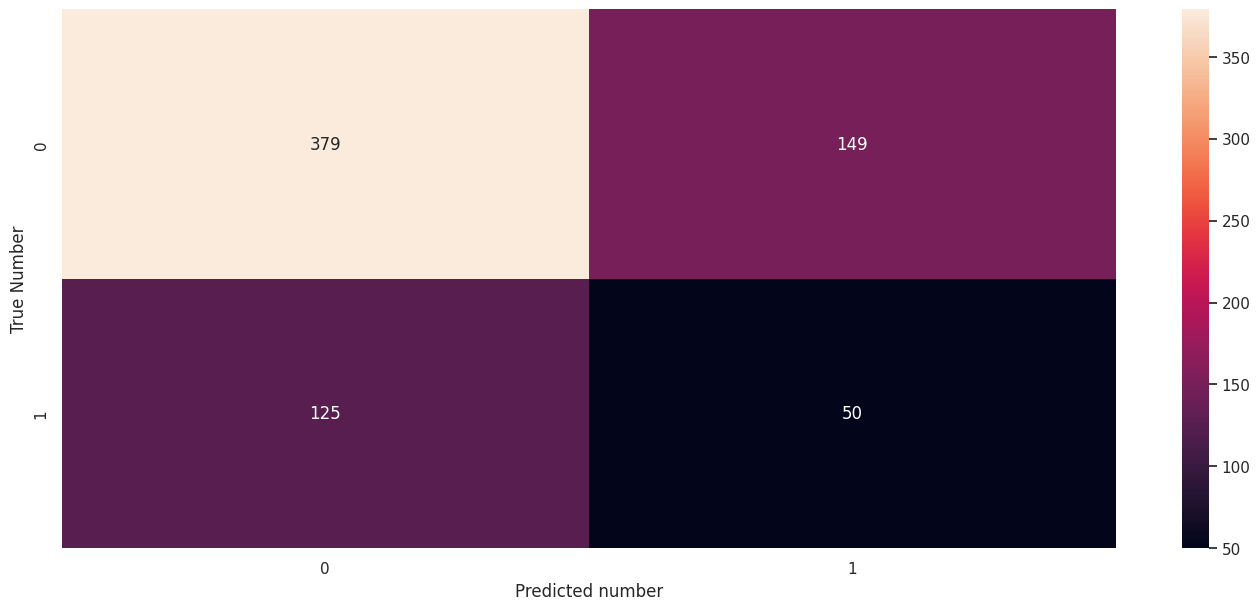

In [40]:
# checking for performance metrices
import seaborn as sb

# Ensure that y_test and y_val have the same length
min_length = min(len(y_test), len(y_val))
y_test = y_test[:min_length]
y_val = y_val[:min_length]

# Checking for performance metrics
print(classification_report(y_test, y_val))

# Plotting the confusion matrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_val)
plt.figure(figsize=(17, 7))
sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted number')
plt.ylabel('True Number')
